<a href="https://colab.research.google.com/github/KhadijatulKobra98/CSC581/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
data = pd.read_csv('/content/gila_river (1).csv')
data.head()

,y(t-1),y(t-2),y(t-3),y(t)
0,0.0,0.0,0.0,32.0
1,32.0,0.0,0.0,27.0
2,27.0,32.0,0.0,27.0
3,27.0,27.0,32.0,25.0
4,25.0,27.0,27.0,27.0


In [31]:
data.shape

(1034, 4)

In [32]:
X = data.drop(columns=['y(t)'])
y = data['y(t)']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
mlp = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=500)
mlp.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=500)

In [36]:
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

In [37]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

In [38]:
print('Training MSE:', mse_train)
print('Testing MSE:', mse_test)

Training MSE: 83055.30885009357
Testing MSE: 22838.358254693638


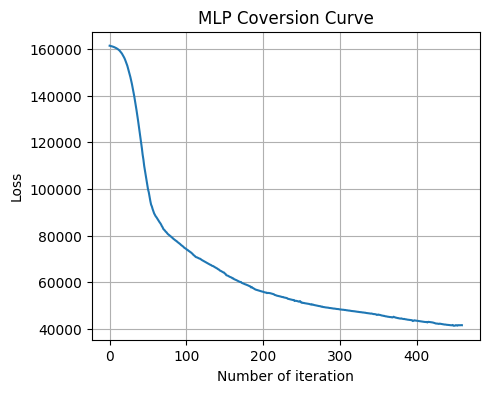

In [39]:
plt.figure(figsize=(5, 4))
plt.plot(mlp.loss_curve_,)
plt.title('MLP Coversion Curve')
plt.xlabel('Number of iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


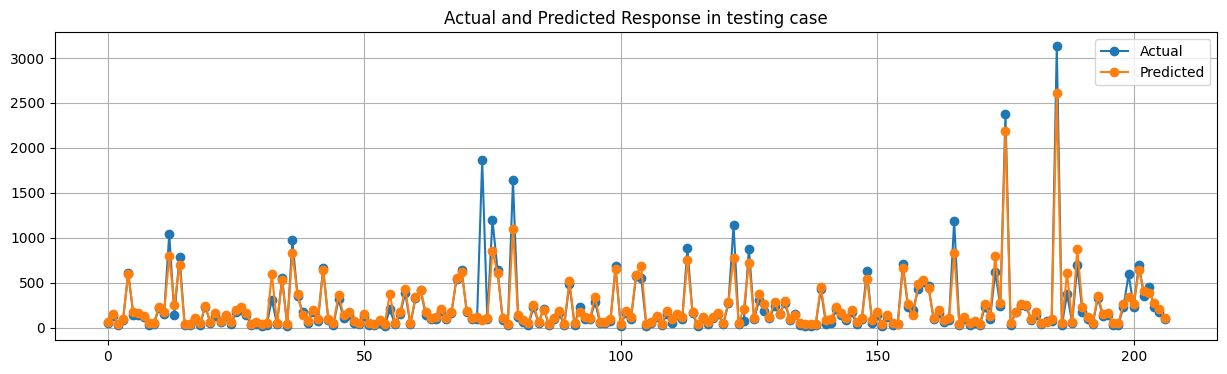

In [40]:
t = range(len(y_test))
plt.figure(figsize=(15,4))
plt.plot(t,y_test, label ='Actual',linestyle ='-', marker ='o')
plt.plot(t,y_test_pred, label ='Predicted',linestyle ='-', marker ='o')
plt.title ('Actual and Predicted Response in testing case')
plt.legend()
plt.grid(True)
plt.show()

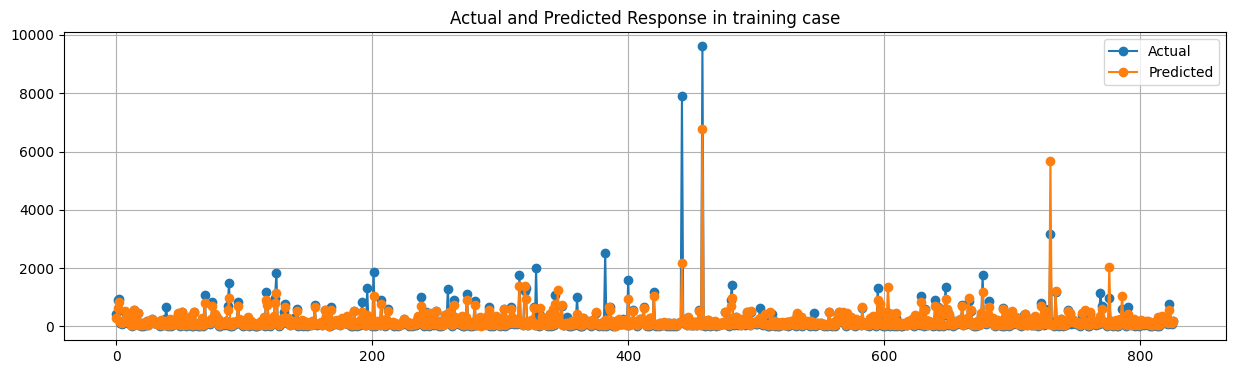

In [41]:
t = range(len(y_train))
plt.figure(figsize=(15,4))
plt.plot(t,y_train, label ='Actual',linestyle ='-', marker ='o')
plt.plot(t,y_train_pred, label ='Predicted',linestyle ='-', marker ='o')
plt.title ('Actual and Predicted Response in training case')
plt.legend()
plt.grid(True)
plt.show()

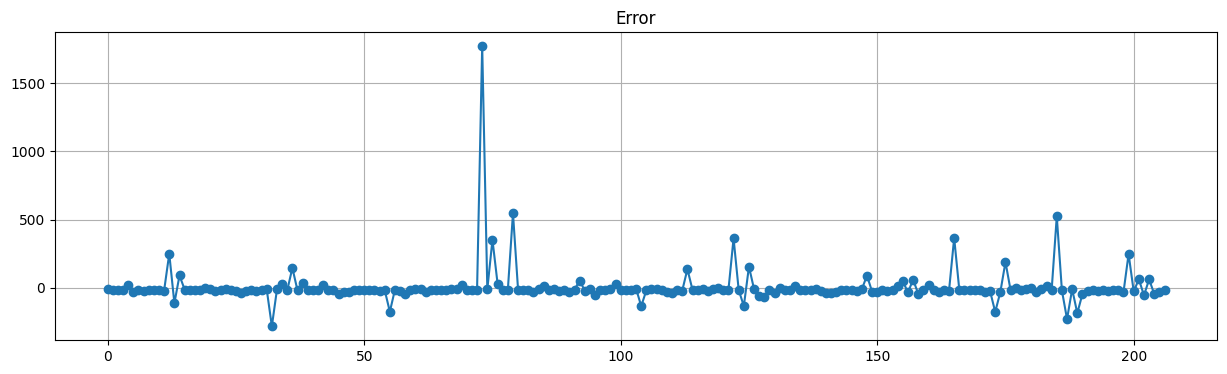

In [42]:
t = range(len(y_test))
plt.figure(figsize=(15,4))
plt.plot(t,y_test- y_test_pred,linestyle ='-', marker ='o')
plt.title ('Error')
plt.grid(True)
plt.show()